In [35]:
%pip install scikit-learn
%pip install pyimagesearch

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pyimagesearch (from versions: none)
ERROR: No matching distribution found for pyimagesearch
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import numpy as np
import os
import cv2

In [70]:
train_dir = "/Users/amir/Desktop/computer_vision/project/DataSet1/train"
test_dir = "/Users/amir/Desktop/computer_vision/project/DataSet1/test"

general_lables = ['Defected', 'Ok']
img_size = 512
def get_data(data_dir):
    images = []
    labels = []
    for label in general_lables:
        path = os.path.join(data_dir, label)
        class_num = general_lables.index(label)
        for img in os.listdir(path):
            try:
                f = os.path.join(path, img)
                img_arr = cv2.imread(f, 0)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                images.append(resized_arr)
                labels.append(label)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

train_images, train_labels = get_data(train_dir)
test_images, test_labels = get_data(test_dir)


OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [72]:
x_train = train_images
y_train = train_labels
x_val = test_images
y_val = test_labels

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [74]:
x_train = x_train.reshape((x_train.shape[0], 262144))
x_val = x_val.reshape((x_val.shape[0], 262144))

In [75]:
print("[INFO] evaluating k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(x_train, y_train)
print(classification_report(y_val, model.predict(x_val),
	target_names=None))

[INFO] evaluating k-NN classifier...
              precision    recall  f1-score   support

    Defected       0.79      0.91      0.85       132
          Ok       0.79      0.58      0.67        77

    accuracy                           0.79       209
   macro avg       0.79      0.75      0.76       209
weighted avg       0.79      0.79      0.78       209



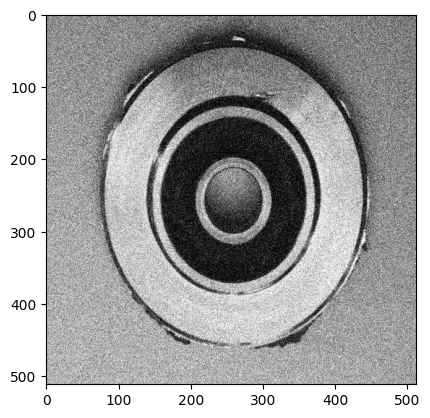

In [77]:
test_img = cv2.imread('/Users/amir/Desktop/aug_gauss_noise_cast_def_0_1257.jpeg', 0)
import matplotlib.pyplot as plt
test_img = cv2.resize(test_img, (512, 512))
plt.imshow(test_img, cmap='gray')

In [78]:
a = np.array(test_img)
a= a.reshape((1, test_img.shape[0]*test_img.shape[1]))
print(a.shape)
out = model.predict(a)
print(out)

(1, 262144)
['Ok']
